In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
add = 'Airline_Dataset_Updated.csv'
airline = pd.read_csv(add)

In [4]:
airline.info

<bound method DataFrame.info of       Passenger ID  First Name  Last Name  Gender  Age Nationality  \
0           ABVWIg      Edithe     Leggis  Female   62       Japan   
1           jkXXAX      Elwood       Catt    Male   62   Nicaragua   
2           CdUz2g       Darby    Felgate    Male   67      Russia   
3           BRS38V    Dominica       Pyle  Female   71       China   
4           9kvTLo         Bay    Pencost    Male   21       China   
...            ...         ...        ...     ...  ...         ...   
98614       hnGQ62      Gareth    Mugford    Male   85       China   
98615       2omEzh       Kasey   Benedict  Female   19      Russia   
98616       VUPiVG      Darrin     Lucken    Male   65   Indonesia   
98617       E47NtS       Gayle  Lievesley  Female   34       China   
98618       8JYEcz  Wilhelmine     Touret  Female   10      Poland   

                      Airport Name Airport Country Code        Country Name  \
0                 Coldfoot Airport              

In [5]:
airline['Departure Date'] = pd.to_datetime(airline['Departure Date'])

In [6]:
airline['Departure Date'].head()

0   2022-06-28
1   2022-12-26
2   2022-01-18
3   2022-09-16
4   2022-02-25
Name: Departure Date, dtype: datetime64[ns]

In [7]:
airline.isna().any(axis=0)

Passenger ID            False
First Name              False
Last Name               False
Gender                  False
Age                     False
Nationality             False
Airport Name            False
Airport Country Code    False
Country Name            False
Airport Continent       False
Continents              False
Departure Date          False
Arrival Airport         False
Pilot Name              False
Flight Status           False
dtype: bool

In [8]:
airline['Age_Range'] = pd.cut(airline['Age'], bins=[0,10,20,30,40,50,60,70,80,90], labels=['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90'])

In [9]:
airline['Departure Date'].unique()

array(['2022-06-28T00:00:00.000000000', '2022-12-26T00:00:00.000000000',
       '2022-01-18T00:00:00.000000000', '2022-09-16T00:00:00.000000000',
       '2022-02-25T00:00:00.000000000', '2022-06-10T00:00:00.000000000',
       '2022-10-30T00:00:00.000000000', '2022-04-07T00:00:00.000000000',
       '2022-08-20T00:00:00.000000000', '2022-04-06T00:00:00.000000000',
       '2022-05-27T00:00:00.000000000', '2022-02-06T00:00:00.000000000',
       '2022-03-19T00:00:00.000000000', '2022-03-24T00:00:00.000000000',
       '2022-03-07T00:00:00.000000000', '2022-07-18T00:00:00.000000000',
       '2022-09-23T00:00:00.000000000', '2022-03-29T00:00:00.000000000',
       '2022-11-03T00:00:00.000000000', '2022-09-05T00:00:00.000000000',
       '2022-02-19T00:00:00.000000000', '2022-11-05T00:00:00.000000000',
       '2022-08-24T00:00:00.000000000', '2022-08-06T00:00:00.000000000',
       '2022-03-20T00:00:00.000000000', '2022-10-03T00:00:00.000000000',
       '2022-12-05T00:00:00.000000000', '2022-04-09

In [10]:
len(airline['Departure Date'].unique())

364

In [11]:
travel_over_time_by_age = airline[['Passenger ID', 'Age_Range', 'Departure Date']]

In [12]:
def month_only(x):
    month = x[:x.index('/')]
    return month

In [13]:
# airline['Departure Date'] = airline['Departure Date'].dt.strftime('%m')
airline['Departure Date'] = airline['Departure Date'].astype(int)

In [14]:
travel_over_time_by_age

,Passenger ID,Age_Range,Departure Date
0,ABVWIg,60-70,2022-06-28
1,jkXXAX,60-70,2022-12-26
2,CdUz2g,60-70,2022-01-18
3,BRS38V,70-80,2022-09-16
4,9kvTLo,20-30,2022-02-25
...,...,...,...
98614,hnGQ62,80-90,2022-12-11
98615,2omEzh,10-20,2022-10-30
98616,VUPiVG,60-70,2022-09-10
98617,E47NtS,30-40,2022-10-26


In [15]:
test = travel_over_time_by_age.groupby(['Age_Range'])['Passenger ID'].count()

In [16]:
test

Age_Range
0-10     10896
10-20    10924
20-30    11110
30-40    10772
40-50    11086
50-60    11059
60-70    10984
70-80    10870
80-90    10918
Name: Passenger ID, dtype: int64

In [17]:
airline.Age.max()

90

In [18]:
def get_age_month(month):
    travel_current = travel_over_time_by_age.loc[travel_over_time_by_age['Departure Date']==month]
    age_val = np.array(travel_current.groupby(['Age_Range'])['Passenger ID'].count())
    return pd.DataFrame(age_val).T

In [19]:
get_age_month(travel_over_time_by_age['Departure Date'].unique()[0])

,0,1,2,3,4,5,6,7,8
0,27,31,38,28,34,42,29,25,27


In [20]:
list(airline.Continents.unique())

['North America', 'Europe', 'South America', 'Asia', 'Oceania', 'Africa']

In [21]:
age_month = pd.DataFrame()
for i in range(364):
    month = travel_over_time_by_age['Departure Date'].unique()[i]
    age_month_current = get_age_month(month)
    age_month = age_month.append(age_month_current, ignore_index=True)

In [22]:
age_month

,0,1,2,3,4,5,6,7,8
0,27,31,38,28,34,42,29,25,27
1,31,38,28,30,34,24,21,26,30
2,32,36,37,20,22,25,37,33,34
3,28,34,19,45,35,27,30,29,30
4,37,33,23,28,31,41,27,21,24
...,...,...,...,...,...,...,...,...,...
359,25,24,33,32,27,35,29,27,34
360,30,33,33,28,25,42,28,38,26
361,27,32,33,21,31,20,37,20,25
362,31,24,31,30,35,35,34,32,28


In [23]:
age_month.columns = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70',
                  '70-80', '80-90']

In [24]:
age_month['Date'] = travel_over_time_by_age['Departure Date'].unique()

In [25]:
age_fine_grain = age_month.resample('8D', on='Date').sum()

In [26]:
age_fine_grain

,0-10,10-20,20-30,30-40,40-50,50-60,60-70,70-80,80-90
Date,,,,,,,,,
2022-01-01,234,251,236,221,250,262,223,205,220
2022-01-09,241,266,261,240,267,228,247,242,250
2022-01-17,231,247,238,230,232,250,241,269,267
2022-01-25,229,244,267,218,254,240,245,229,224
2022-02-02,239,249,236,199,239,250,248,230,223
2022-02-10,246,243,292,259,247,242,262,236,240
2022-02-18,259,227,240,230,251,271,263,233,241
2022-02-26,245,222,208,233,255,236,246,230,225
2022-03-06,245,233,256,243,261,256,231,239,227


In [27]:
color = ['#b7ddde','#e3f3eb','#6dc6dd','#206e9e','#75ccd1','#0e467e','#3890b5','#042d58','#f5faf4']

In [28]:
color = list(reversed(color))

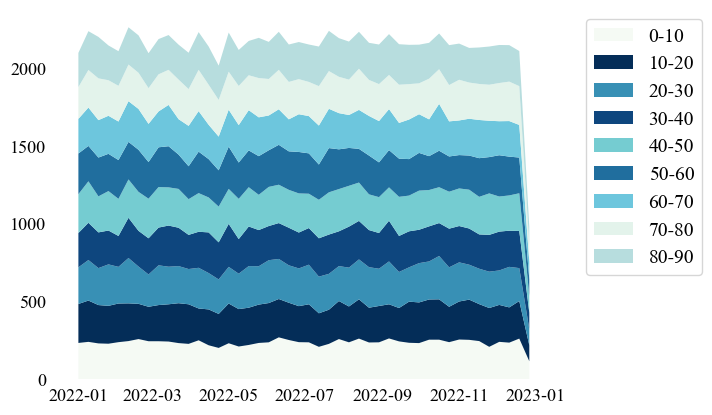

In [29]:
fig, ax = plt.subplots()
ax.stackplot(age_fine_grain.index, age_fine_grain.T, labels=age_fine_grain.columns,colors=color)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.tick_params(left=False)
ax.tick_params(bottom=False)
ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1), prop={'family': 'Times New Roman', 'size': 14})
plt.xticks(fontproperties='Times New Roman', size=13)
plt.yticks(fontproperties='Times New Roman', size=13)
plt.savefig('travel_by_age.png', dpi=320, bbox_inches='tight')

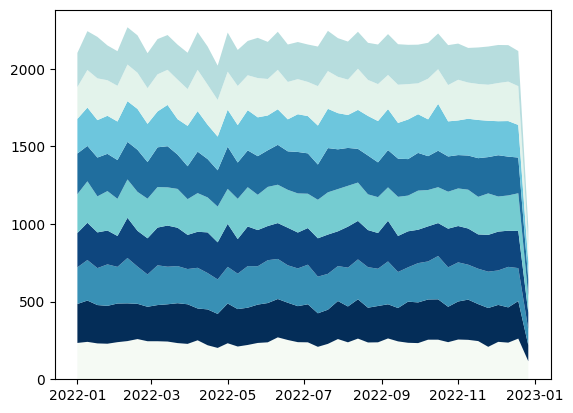

In [30]:
fig, ax = plt.subplots()
ax.stackplot(age_fine_grain.index, age_fine_grain.T, labels=age_fine_grain.columns,colors=color)

In [31]:
import plotly.express as px

In [32]:
np.unique(airline['Flight Status'])

array(['Cancelled', 'Delayed', 'On Time'], dtype=object)

In [33]:
country_count = pd.DataFrame(airline['Country Name'].value_counts())

In [34]:
country_count['Country'] = list(country_count.index)

In [35]:
country_count

,Country Name,Country
United States,22104,United States
Australia,6370,Australia
Canada,5424,Canada
Brazil,4504,Brazil
Papua New Guinea,4081,Papua New Guinea
...,...,...
Andorra,7,Andorra
Monaco,7,Monaco
Nauru,7,Nauru
Palau,5,Palau


In [36]:
Continent = []
for i in country_count.Country:
    temp = list(airline.Continents[airline['Country Name'] == i])
    Continent.append(temp[0])

In [37]:
country_count['Continent'] = Continent

In [38]:
country_count.columns = ['Count', 'Country', 'Continent']

In [39]:
country_count

,Count,Country,Continent
United States,22104,United States,North America
Australia,6370,Australia,Oceania
Canada,5424,Canada,North America
Brazil,4504,Brazil,South America
Papua New Guinea,4081,Papua New Guinea,Oceania
...,...,...,...
Andorra,7,Andorra,Europe
Monaco,7,Monaco,Europe
Nauru,7,Nauru,Oceania
Palau,5,Palau,Oceania


In [118]:
fig = px.sunburst(country_count, path=['Continent', 'Country'], values='Count',
                  color='Count', 
                  color_continuous_scale='GnBu',
                  color_continuous_midpoint=np.average(country_count['Count'], weights=country_count['Count']),
                  title='Traveling Records among Different Countries in Different Continents')
fig.show()

In [119]:
fig.update_layout(title_text='Traveling Records among Different Countries in Different Continents', title_x=0.5)

In [41]:
nationality_count = pd.DataFrame(airline['Nationality'].value_counts())

In [42]:
nationality_count['Country'] = list(nationality_count.index)

In [43]:
nationality_count.columns = ['Count', 'Country']

In [44]:
len(nationality_count)

240

In [45]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="yis121@pitt.edu")

In [46]:
def geolocate(country):
    try:
        location = geolocator.geocode(country)
        return (location.latitude, location.longitude)
    except:
        return (0, 0)

In [50]:
nationality_count

,Count,Country
China,18317,China
Indonesia,10559,Indonesia
Russia,5693,Russia
Philippines,5239,Philippines
Brazil,3791,Brazil
...,...,...
Romania,2,Romania
British Virgin Islands,2,British Virgin Islands
Jersey,1,Jersey
Norfolk Island,1,Norfolk Island


In [54]:
geolocation = []
for i in nationality_count.Country:
    temp = geolocate(i)
    geolocation.append(temp)

In [55]:
geolocation

[(30.047992, -94.3357433),
 (-2.4833826, 117.8902853),
 (40.2338211, -84.4096729),
 (12.7503486, 122.7312101),
 (-10.3333333, -53.2),
 (39.6621648, -8.1353519),
 (52.215933, 19.134422),
 (46.603354, 1.8883335),
 (44.133435, -70.822678),
 (39.7837304, -100.445882),
 (36.5748441, 139.2394179),
 (49.7439047, 15.3381061),
 (49.4871968, 31.2718321),
 (-6.8699697, -75.0458515),
 (13.03876215, 101.70017611907599),
 (4.099917, -72.9088133),
 (-34.9964963, -64.9672817),
 (43.2097838, -77.6930602),
 (61.0666922, -107.991707),
 (19.4326296, -99.1331785),
 (9.6000359, 7.9999721),
 (15.9266657, 107.9650855),
 (-28.8166236, 24.991639),
 (63.2467777, 25.9209164),
 (30.3308401, 71.247499),
 (44.024322850000004, 21.07657433209902),
 (2.9368696, 115.4443356),
 (15.2572432, -86.0755145),
 (45.3658443, 15.6575209),
 (4.5693754, 102.2656823),
 (64.5731537, 11.52803643954819),
 (8.0018709, -66.1109318),
 (1.2315264, -75.89204331320687),
 (43.9382593, -79.2235563),
 (52.865196, -7.9794599),
 (28.3347722, -10

In [56]:
geolocation = pd.DataFrame(geolocation)

In [57]:
geolocation

,0,1
0,30.047992,-94.335743
1,-2.483383,117.890285
2,40.233821,-84.409673
3,12.750349,122.731210
4,-10.333333,-53.200000
...,...,...
235,45.985213,24.685923
236,18.402439,-64.566164
237,49.221456,-2.135839
238,-29.032804,167.948314


In [58]:
geolocation.columns = ['latitude', 'longitude']

In [59]:
nationality_count['latitude'] = list(geolocation['latitude'])

In [60]:
nationality_count['longitude'] = list(geolocation['longitude'])

In [67]:
nationality_count

,Count,Country,latitude,longitude
China,18317,China,30.047992,-94.335743
Indonesia,10559,Indonesia,-2.483383,117.890285
Russia,5693,Russia,40.233821,-84.409673
Philippines,5239,Philippines,12.750349,122.731210
Brazil,3791,Brazil,-10.333333,-53.200000
...,...,...,...,...
Romania,2,Romania,45.985213,24.685923
British Virgin Islands,2,British Virgin Islands,18.402439,-64.566164
Jersey,1,Jersey,49.221456,-2.135839
Norfolk Island,1,Norfolk Island,-29.032804,167.948314


In [61]:
airline['Latitude'] = np.zeros(len(airline))

In [62]:
airline['Longitude'] = np.zeros(len(airline))

In [71]:
nationality_count = nationality_count.reset_index()

In [89]:
nationality_count

,index,Count,Country,latitude,longitude
0,China,18317,China,30.047992,-94.335743
1,Indonesia,10559,Indonesia,-2.483383,117.890285
2,Russia,5693,Russia,40.233821,-84.409673
3,Philippines,5239,Philippines,12.750349,122.731210
4,Brazil,3791,Brazil,-10.333333,-53.200000
...,...,...,...,...,...
235,Romania,2,Romania,45.985213,24.685923
236,British Virgin Islands,2,British Virgin Islands,18.402439,-64.566164
237,Jersey,1,Jersey,49.221456,-2.135839
238,Norfolk Island,1,Norfolk Island,-29.032804,167.948314


In [81]:
airline['Country Name'][16]

'Venezuela, Bolivarian Republic of'

In [82]:
lat = nationality_count['latitude'][nationality_count['Country'] == airline['Country Name'][16]]

In [86]:
list(lat) == []

True

In [87]:
for i in range(len(airline)):
    lat = nationality_count['latitude'][nationality_count['Country'] == airline['Country Name'][i]]
    lon = nationality_count['longitude'][nationality_count['Country'] == airline['Country Name'][i]]
    if list(lat)==[] or list(lon)==[]:
        lat, lon = 0, 0
    else:
        airline['Latitude'][i] = lat
        airline['Longitude'][i] = lon

In [93]:
import geopandas as gpd

In [94]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [95]:
world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1794248.0,Europe,Kosovo,-99,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


In [ ]:
nationality_coords = world[world['name'] == nationality_country]['geometry'].values[0]

In [88]:
airline

,Passenger ID,First Name,Last Name,Gender,Age,Nationality,Airport Name,Airport Country Code,Country Name,Airport Continent,Continents,Departure Date,Arrival Airport,Pilot Name,Flight Status,Age_Range,Latitude,Longitude
0,ABVWIg,Edithe,Leggis,Female,62,Japan,Coldfoot Airport,US,United States,NAM,North America,1656374400000000000,CXF,Fransisco Hazeldine,On Time,60-70,39.783730,-100.445882
1,jkXXAX,Elwood,Catt,Male,62,Nicaragua,Kugluktuk Airport,CA,Canada,NAM,North America,1672012800000000000,YCO,Marla Parsonage,On Time,60-70,61.066692,-107.991707
2,CdUz2g,Darby,Felgate,Male,67,Russia,Grenoble-Isère Airport,FR,France,EU,Europe,1642464000000000000,GNB,Rhonda Amber,On Time,60-70,46.603354,1.888334
3,BRS38V,Dominica,Pyle,Female,71,China,Ottawa / Gatineau Airport,CA,Canada,NAM,North America,1663286400000000000,YND,Kacie Commucci,Delayed,70-80,61.066692,-107.991707
4,9kvTLo,Bay,Pencost,Male,21,China,Gillespie Field,US,United States,NAM,North America,1645747200000000000,SEE,Ebonee Tree,On Time,20-30,39.783730,-100.445882
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98614,hnGQ62,Gareth,Mugford,Male,85,China,Hasvik Airport,NO,Norway,EU,Europe,1670716800000000000,HAA,Pammie Kingscote,Cancelled,80-90,64.573154,11.528036
98615,2omEzh,Kasey,Benedict,Female,19,Russia,Ampampamena Airport,MG,Madagascar,AF,Africa,1667088000000000000,IVA,Dorice Lochran,Cancelled,10-20,-18.924960,46.441642
98616,VUPiVG,Darrin,Lucken,Male,65,Indonesia,Albacete-Los Llanos Airport,ES,Spain,EU,Europe,1662768000000000000,ABC,Gearalt Main,On Time,60-70,39.326068,-4.837979
98617,E47NtS,Gayle,Lievesley,Female,34,China,Gagnoa Airport,CI,Côte d'Ivoire,AF,Africa,1666742400000000000,GGN,Judon Chasle,Cancelled,30-40,0.000000,0.000000


In [91]:
import folium
from folium.plugins import MarkerCluster
world_map= folium.Map()
marker_cluster = MarkerCluster().add_to(world_map)
#for each coordinate, create circlemarker of user percent
for i in range(len(nationality_count)):
        lat = nationality_count.iloc[i]['latitude']
        long = nationality_count.iloc[i]['longitude']
        radius = 5
        popup_text = """Country : {}<br>
                    %of Travellers : {}<br>"""
        popup_text = popup_text.format(nationality_count.iloc[i]['Country'],
                                   nationality_count.iloc[i]['Count']
                                   )
        folium.CircleMarker(location = [lat, long], radius = radius, popup = popup_text, fill = True).add_to(marker_cluster)
#show the map
world_map

In [96]:
import plotly.graph_objects as go

In [109]:
fig1 = px.sunburst(nationality_count, path=['Country'], values='Count',
             color='Count', 
             title='Which Country\'s Citizens Love Travelling Most',
             color_continuous_scale='GnBu')
fig1.show()

In [120]:
fig1.update_layout(title_text='Which Country\'s Citizens Love Travelling Most', title_x=0.5)